In [8]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import itertools
import base64
import io
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import cifar10

In [4]:
#Loading cifar10 dataset
(xTrain,yTrain),(xTest,yTest)=cifar10.load_data()

170498071/170498071 [==============================] - 28s 0us/step


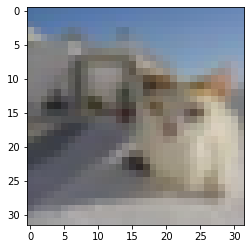

In [9]:
#checking whether the data has been loaded properly or not
plt.imshow(xTrain[80])

In [10]:
no_class = 10
yTrain = tf.keras.utils.to_categorical(yTrain, no_class)
yTest = tf.keras.utils.to_categorical(yTest, no_class)

In [11]:
#converting the data type of the dataset
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')
xTrain = xTrain/255
xTest =xTest/255

In [25]:
#Building the model
model=Sequential([
    layers.Rescaling(1.0/255),             
    layers.Conv2D(16,3,padding='same',activation='relu',input_shape=xTrain.shape[1:]),       
    layers.Flatten(),                    
    layers.Dense(128,activation='relu'),   
    layers.Dense(no_class)
])

In [26]:
#compiling the model
model.compile(optimizer='adam',
             loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),     
             metrics=['accuracy']
             )

In [28]:
#fitting the model
history=model.fit(xTrain,yTrain,                      
                  validation_data=(xTest,yTest),       
                  epochs=15, 
                  batch_size=32,
                  verbose=1                       
                 )

Epoch 1/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.5499 - accuracy: 0.4511 - val_loss: 1.5286 - val_accuracy: 0.4612
Epoch 2/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5135 - accuracy: 0.4613 - val_loss: 1.5172 - val_accuracy: 0.4637
Epoch 3/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4869 - accuracy: 0.4737 - val_loss: 1.4789 - val_accuracy: 0.4749
Epoch 4/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4629 - accuracy: 0.4812 - val_loss: 1.4688 - val_accuracy: 0.4787
Epoch 5/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4428 - accuracy: 0.4869 - val_loss: 1.4657 - val_accuracy: 0.4809
Epoch 6/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4246 - accuracy: 0.4930 - val_loss: 1.4366 - val_accuracy: 0.4929
Epoch 7/15
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4121 - accuracy: 0.5015 - val_loss: 1.4398 -